Leveraging the BeautifulSoup Python library, I parse and extract the data from each entry for each commercial jetliner incident, as seen below (FIGURE 1). This will allow me to scrape the data from the HTML site for the Aviation Safety Network database. Below is also a sample entry, I am looking to extract each of the attributes such as date, time, aircraft type, fatalities, etc.

FIGURE 1: 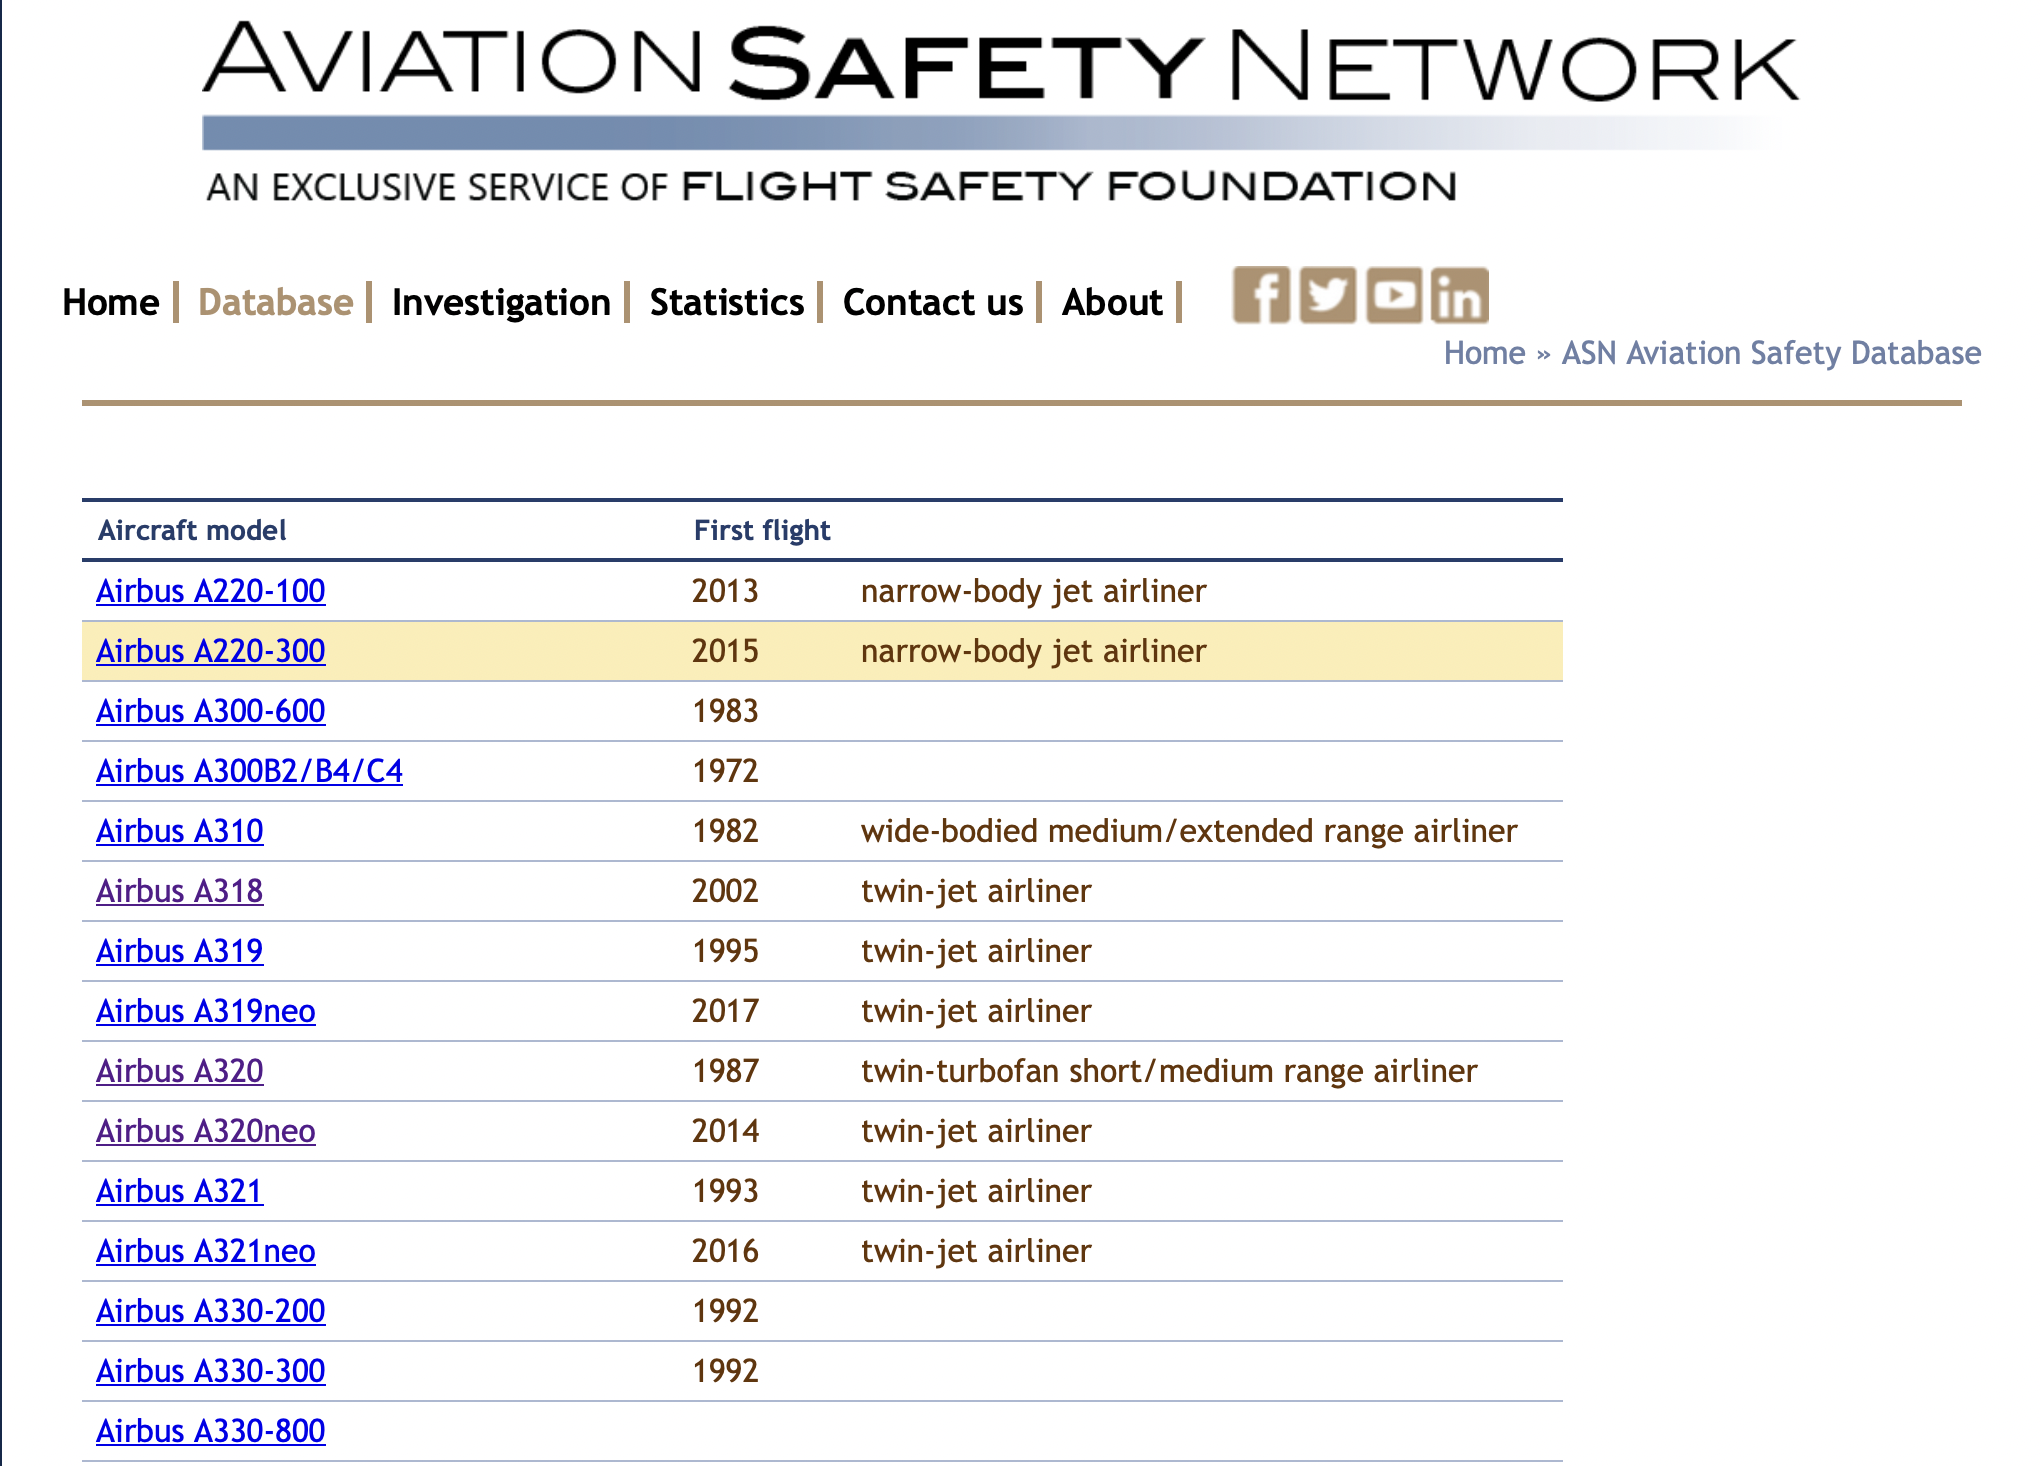

FIGURE 2: 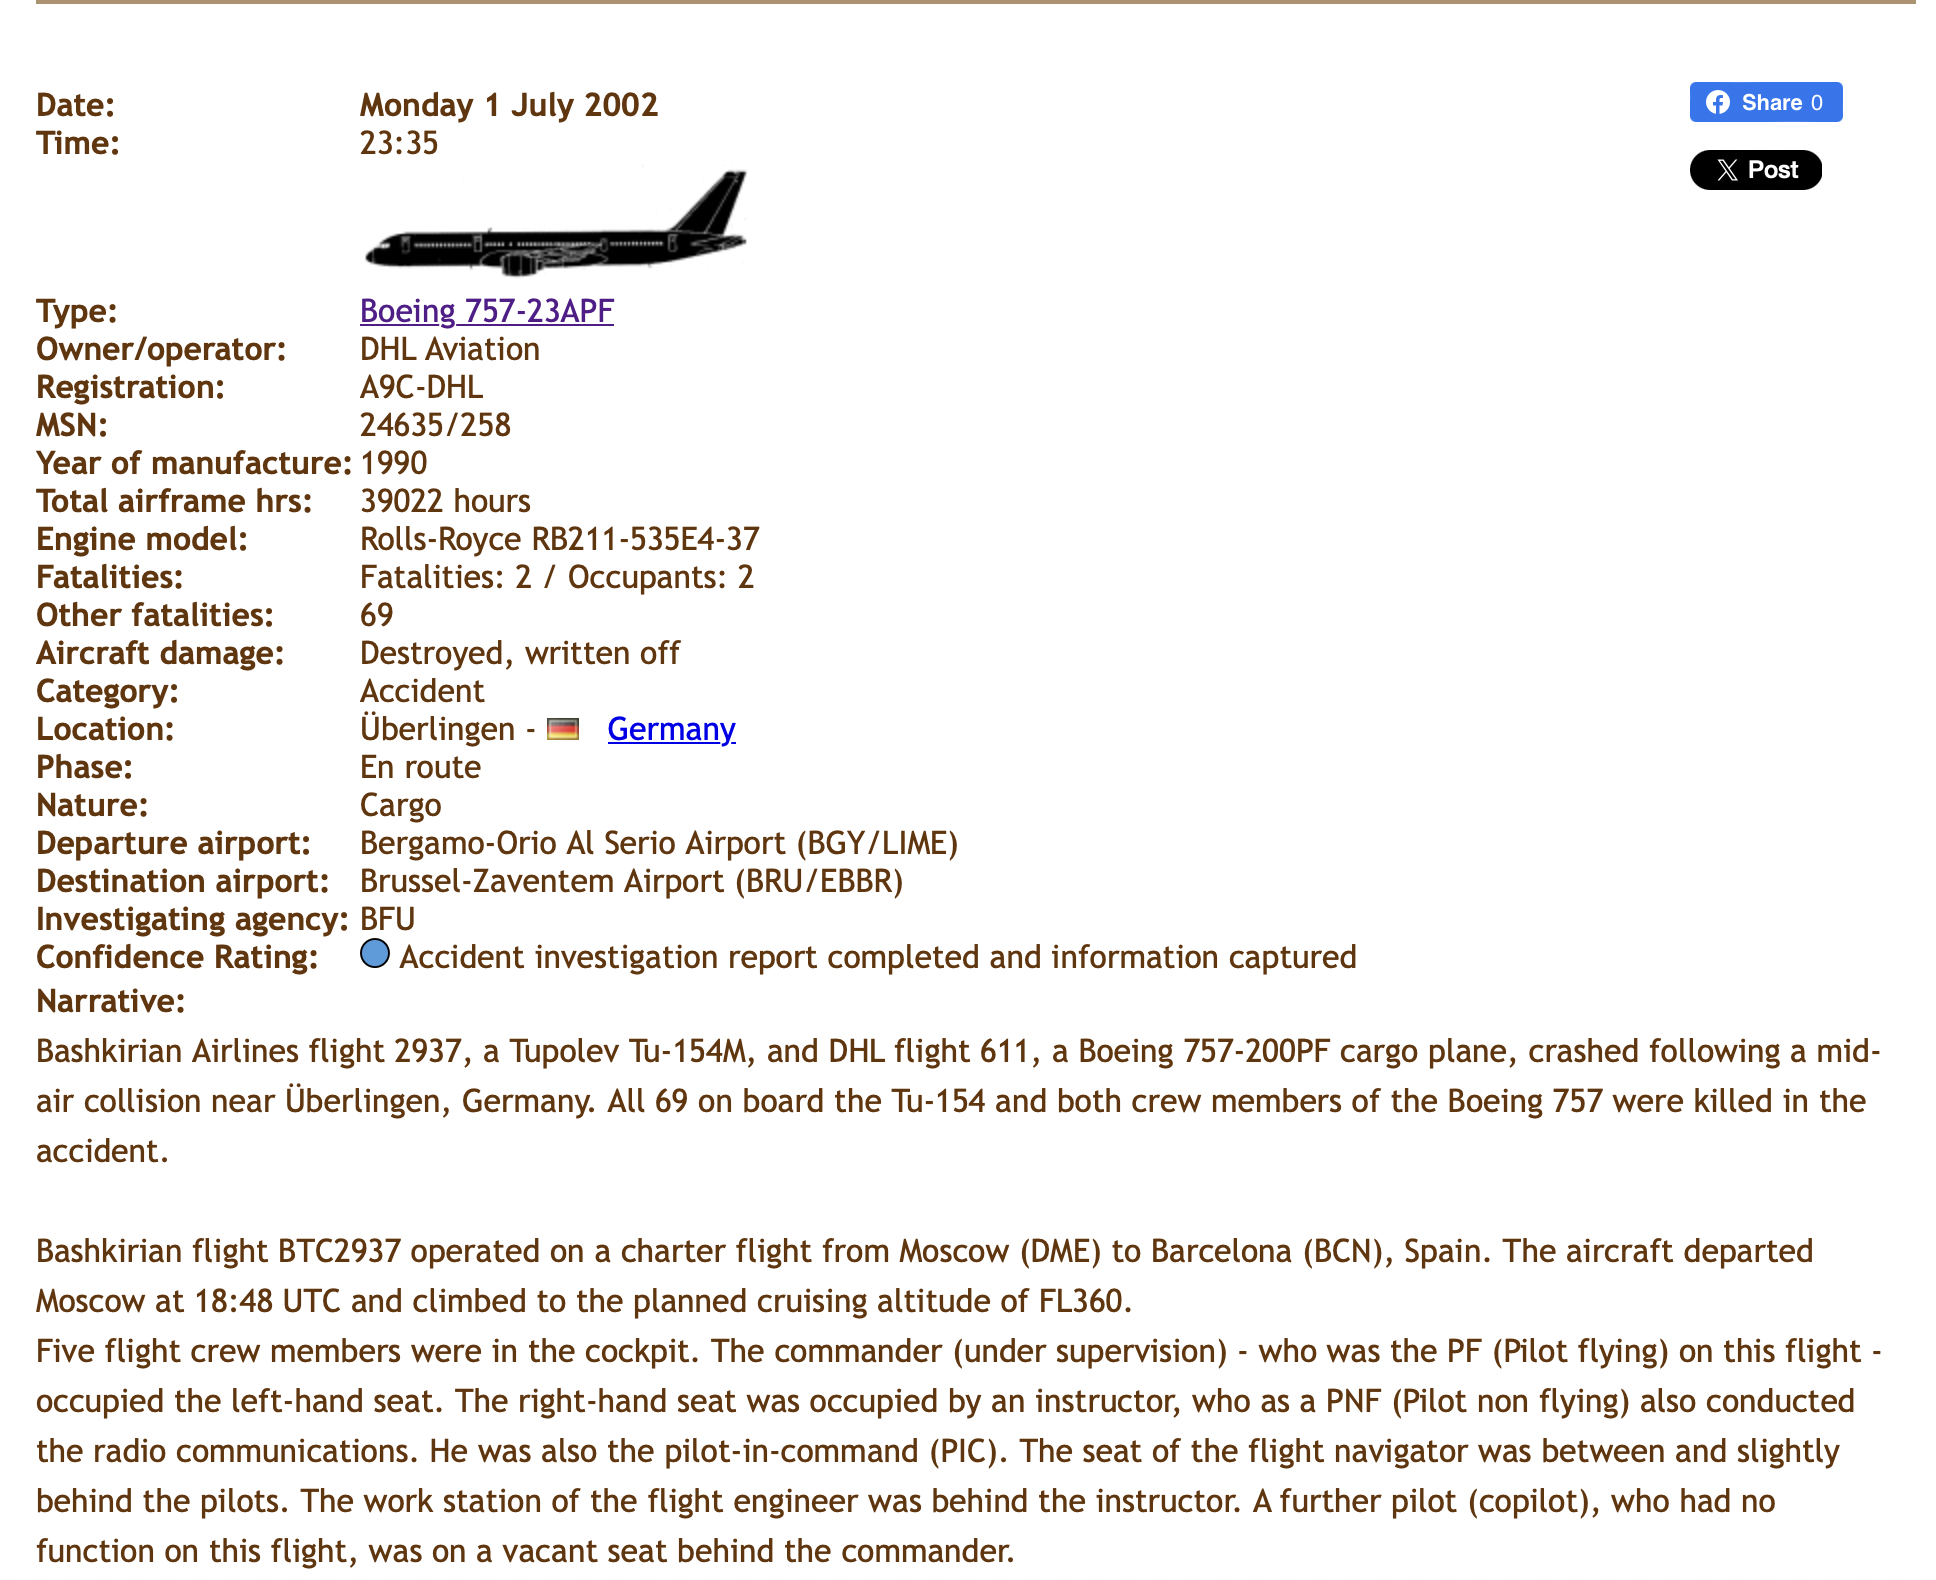

In [4]:
import requests
from bs4 import BeautifulSoup
import time # <<< used to delay script execution when scraping

#STEP 1: Set up scraping and find links for each aircraft model

#Need to set up headers to mimic user requests coming from a browser, avoid being blocked/limited by website
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

main_url = "https://asn.flightsafety.org/asndb/types/CJ" #<<< main URL for scraping from ASN database

response = requests.get(main_url, headers=headers)
soup = BeautifulSoup(response.text) #<<< use soup to parse HTML

aircraft_links = [] #<<< List used to store the URLs for each individual aircraft model. Ex: 'https://asn.flightsafety.org/asndb/type/A320'

#Use for loop to iterate over all anchor tags in parsed HTML containng 'href' (hyperlink) attributes
for a_tag in soup.find_all('a', href = True):
    if '/asndb/type/' in a_tag['href']: #'/asndb/type/' is consistent with all URL paths for each aircraft model
        full_url = f"https://asn.flightsafety.org{a_tag['href']}"
        aircraft_links.append(full_url)


